In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lmfit import Model
import matplotlib.ticker as ticker

sns.set_theme(palette = 'cividis_r', style = 'ticks')
formatter = ticker.FuncFormatter(lambda x, pos: "{:.1f}".format(x * 1e6))

[[Model]]
    Model(ran_sev)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 5
    # variables        = 2
    chi-square         = 5.4098e-10
    reduced chi-square = 1.8033e-10
    Akaike info crit   = -110.735342
    Bayesian info crit = -111.516466
    R-squared          = 0.99013702
[[Variables]]
    D:  1.0717e-13 +/- 1.2351e-14 (11.52%) (init = 1e-10)
    a: -6.7248e-05 +/- 1.3241e-05 (19.69%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(D, a) = -0.891
[[Model]]
    Model(ran_sev)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 5
    # variables        = 2
    chi-square         = 3.5966e-10
    reduced chi-square = 1.1989e-10
    Akaike info crit   = -112.776486
    Bayesian info crit = -113.557610
    R-squared          = 0.99326282
[[Variables]]
    D:  1.0463e-13 +/- 9.9506e-15 (9.51%) (init = 1e-10)
    a: -6.4933e-05 +/- 1.0796e-05 (16

Text(0, 0.5, 'Current Peak ($\\mu$A)')

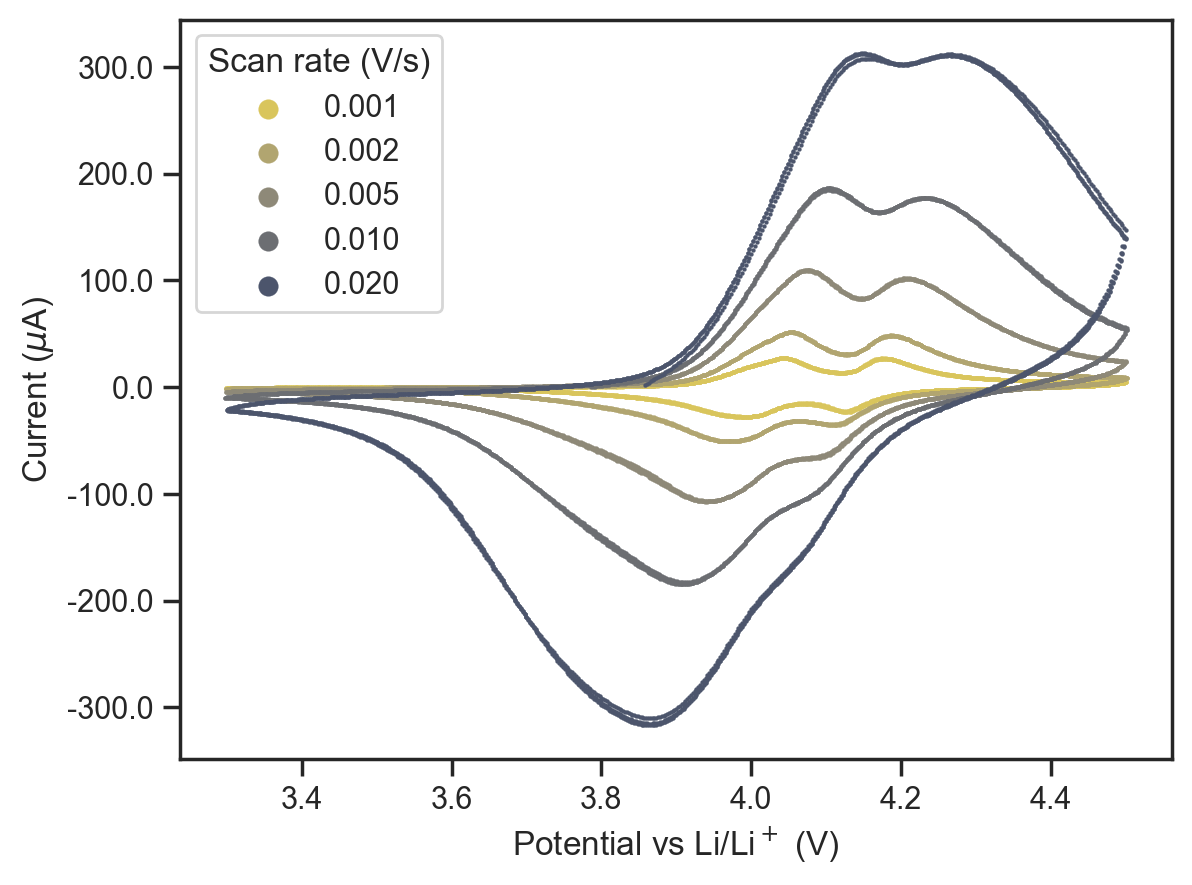

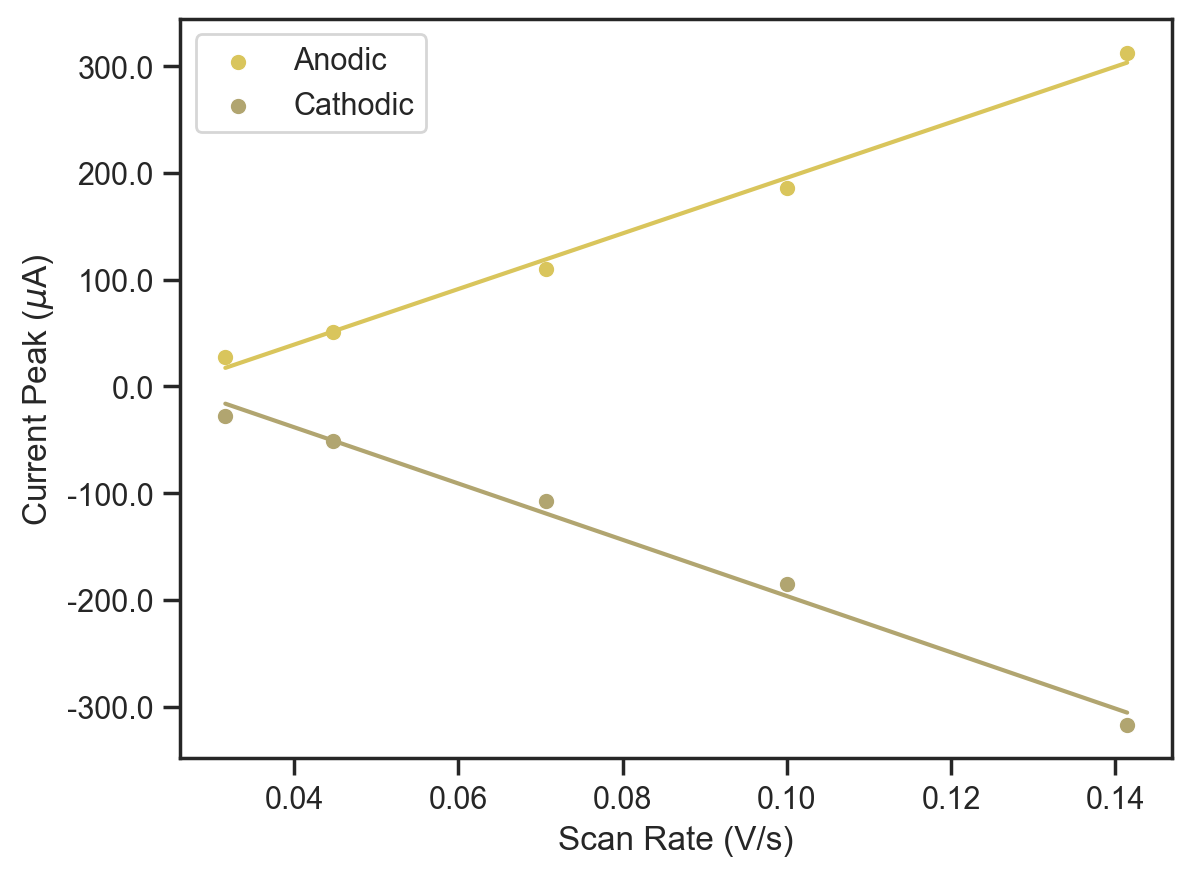

In [2]:
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LESK32\PLSA Pt\ScanRate'
files = [os.path.join(path, i) for i in os.listdir(path)]
col = ['Potential vs Li/Li$^+$ (V)', 'Current (A)', 'Charge (C)', 'Time (s)']
col2 = ['Current Peak (A)', 'Scan Rate (V/s)']
area = 0.785 # 7.85e-5 # m2 #
F = 96485.3321 # C / mol
R = 8.31446261815324 # J /(K * mol)
T = 300 #K
N = 1
C = 0.038297 # mol/cm3
def ran_sev(v, D, a): # C
    return 0.4463 * N * F * area * C * ((N * F * v * D) / (R * T))**0.5  + a

i_p_c = pd.DataFrame(columns = col2)
i_p_a = pd.DataFrame(columns = col2)

fig, ax = plt.subplots(dpi = 200)

n = 0
for i in files:    
    df = pd.read_csv(i, sep = ';', names = col, skiprows=1)
    current_peak_c = -min(df[col[1]])
    current_peak_a = max(df[col[1]])
    i_p_c.loc[n] = (current_peak_c, float(i[-13:-8]))
    i_p_a.loc[n] = (current_peak_a, float(i[-13:-8])) 
    n += 1 
    sns.scatterplot(data = df, x = col[0], y = col[1], edgecolor = None, s = 2, label = i[-13:-8])
ax.legend(title = 'Scan rate (V/s)', markerscale = 5)
ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Current ($\mu$A)')
    
# Model fit
gmodel = Model(ran_sev)
params = gmodel.make_params()
params['D'].set(value = 1e-10, min = 1e-15, max = 1e-7)
params['a'].set(value = 1)
# params['area'].set(value = 0.785, min = 0.6, max = 0.8)
# params['C'].set(value = 1e-3, min = 1e-12, max = 1)

result = gmodel.fit(i_p_c[col2[0]], params, v = i_p_c[col2[1]])
result_a = gmodel.fit(i_p_a[col2[0]], params, v = i_p_a[col2[1]])
print(result.fit_report())
print(result_a.fit_report())

fig, ax = plt.subplots(dpi = 200)
sns.scatterplot(x = np.sqrt(i_p_a[col2[1]]), y = i_p_a[col2[0]], label = 'Anodic')
sns.scatterplot(x = np.sqrt(i_p_c[col2[1]]), y = -i_p_c[col2[0]], label = 'Cathodic')

plt.plot(np.sqrt(i_p_a[col2[1]]), result_a.best_fit)
plt.plot(np.sqrt(i_p_c[col2[1]]), -result.best_fit)


ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Current Peak ($\mu$A)')
# i_p_c

In [3]:

a = 184.5e15 / 80e-7 
a = a / 6.022e23
print(a)

0.03829707738292926
